<a href="https://colab.research.google.com/github/krystoliz/TemanPuan/blob/main/Labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Colab Notebooks/dataset/patriarki_prepro.xlsx"
data = pd.read_excel(path)
data.head(4)

,Unnamed: 0,full_text,username,created_at,full_text_translated
0,0,mengijinkan istri menggunakan pil kb walaupun ...,AndrewsTjan,Fri May 17 07:26:46 +0000 2024,allow the wife to use birth control pills even...
1,1,pgn dokter takut disaranin minum pil kb lg mak...,putyoufirst__,Fri May 17 04:36:05 +0000 2024,I'm afraid the doctor will advise me to take b...
2,2,generasi pil kb suntik kb,linwang00089174,Fri May 17 01:37:15 +0000 2024,"generation of birth control pills, birth contr..."
3,3,si tolol mengira pasangan menikah seks menggun...,ketekreze,Fri May 17 01:11:03 +0000 2024,The fool thinks that married couples have sex ...


In [ ]:
data.info

<bound method DataFrame.info of        Unnamed: 0                                          full_text  \
0               0  mengijinkan istri menggunakan pil kb walaupun ...   
1               1  pgn dokter takut disaranin minum pil kb lg mak...   
2               2                          generasi pil kb suntik kb   
3               3  si tolol mengira pasangan menikah seks menggun...   
4               4  mencegah biar ga hamilnambah anak gblk bukan c...   
...           ...                                                ...   
13687       13705                   kapan si nunjukin patriarki wkwk   
13688       13706  alhamdulillah udah dr sma dpt temen cowok gak ...   
13689       13707  emang sjw feminis ekstrem makin hari makin ga ...   
13690       13708  big no emang mau tetep berkarir walaupun udh n...   
13691       13709  kan digaungkan gerakan melawan patriarki kalo ...   

              username                      created_at  \
0          AndrewsTjan  Fri May 17 07:26:46 +0000 2024   
1        putyoufirst__  Fri May 17 04:36:05 +0000 2024   
2      linwang00089174  Fri May 17 01:37:15 +0000 2024   
3            ketekreze  Fri May 17 01:11:03 +0000 2024   
4        anothermaria4  Fri May 17 00:31:31 +0000 2024   
...                ...                             ...   
13687        risserius  Mon Mar 11 02:12:32 +0000 2024   
13688         isvereux  Mon Mar 11 02:10:48 +0000 2024   
13689       sintya____  Mon Mar 11 02:07:25 +0000 2024   
13690        triviaswz  Mon Mar 11 02:06:35 +0000 2024   
13691       ayamungkap  Mon Mar 11 02:05:48 +0000 2024   

                                    full_text_translated  
0      allow the wife to use birth control pills even...  
1      I'm afraid the doctor will advise me to take b...  
2      generation of birth control pills, birth contr...  
3      The fool thinks that married couples have sex ...  
4      Preventing pregnancy so that you don't get mor...  
...                                                  ...  
13687                when will he show patriarchy hahaha  
13688  Thank God, I've had a boyfriend since high sch...  
13689  It's true that extreme feminists are increasin...  
13690  big no, I really want to continue my career ev...  
13691  A movement against patriarchy is being launche...  

[13692 rows x 5 columns]>

In [ ]:
data.drop_duplicates(subset='full_text', keep="first", inplace =True)
data.info()

KeyError: Index(['full_text'], dtype='object')

In [ ]:
df = pd.DataFrame(data['full_text'].iloc[0:50])
df.head(5)

,full_text
0,mengijinkan istri menggunakan pil kb walaupun ...
1,pgn dokter takut disaranin minum pil kb lg mak...
2,generasi pil kb suntik kb
3,si tolol mengira pasangan menikah seks menggun...
4,mencegah biar ga hamilnambah anak gblk bukan c...


# cleaning

---



In [ ]:
import re
import string
import nltk

def remove_URL

SyntaxError: invalid syntax (<ipython-input-5-1c4c9d5f7ed8>, line 5)

#Labelling

---



#NLTK

In [ ]:
df=pd.DataFrame(data['full_text'])
df.head(5)

,full_text
0,mengijinkan istri menggunakan pil kb walaupun ...
1,pgn dokter takut disaranin minum pil kb lg mak...
2,generasi pil kb suntik kb
3,si tolol mengira pasangan menikah seks menggun...
4,mencegah biar ga hamilnambah anak gblk bukan c...


In [ ]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['full_text_translated']:
  sentiment_scores = data.polarity_scores(text)
  compound_score = sentiment_scores['compound']

  scores.append(compound_score)

  if compound_score > 0:
    label = 'positif'
  elif compound_score < 0:
    label = 'negatif'
  else:
    label = 'netral'

  labels.append(label)

df['sentiment_score']=scores
df['sentiment']=labels

data = ['full_text_translated','sentiment_score','sentiment']
data=df[data]

data.head(5)

KeyError: 'full_text_translated'

<ipython-input-9-5ae57a0c8370>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


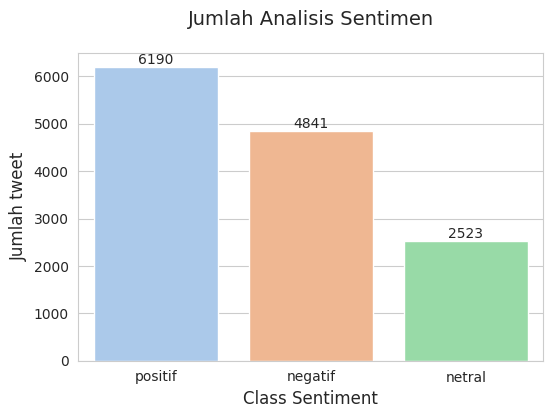

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig,ax = plt.subplots(figsize=(6,4))
ax=sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize = 12)
plt.ylabel('Jumlah tweet', fontsize=12)

for i,count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
data.to_excel('Hasil-Labelling-Data-nltk.csv', encoding='utf8', index=False)


#VaderSentiment

In [ ]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
df = pd.DataFrame(data['full_text_translated'])
df.head(5)

,full_text_translated
0,allow the wife to use birth control pills even...
1,I'm afraid the doctor will advise me to take b...
2,"generation of birth control pills, birth contr..."
3,The fool thinks that married couples have sex ...
4,Preventing pregnancy so that you don't get mor...


In [ ]:
scores = [analyser.polarity_scores(x) for x in df['full_text_translated']]
df['Compound_Score'] = [x['compound'] for x in scores]

df.head(5)

,full_text_translated,Compound_Score
0,allow the wife to use birth control pills even...,0.7269
1,I'm afraid the doctor will advise me to take b...,0.0314
2,"generation of birth control pills, birth contr...",0.0000
3,The fool thinks that married couples have sex ...,-0.4956
4,Preventing pregnancy so that you don't get mor...,0.0772


In [ ]:
df.loc[df['Compound_Score']<0, 'Sentiments'] = 'Negatif'
df.loc[df['Compound_Score']==0, 'Sentiments'] = 'Netral'
df.loc[df['Compound_Score']>0, 'Sentiments'] = 'Positif'

<ipython-input-9-49b3d31db1ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


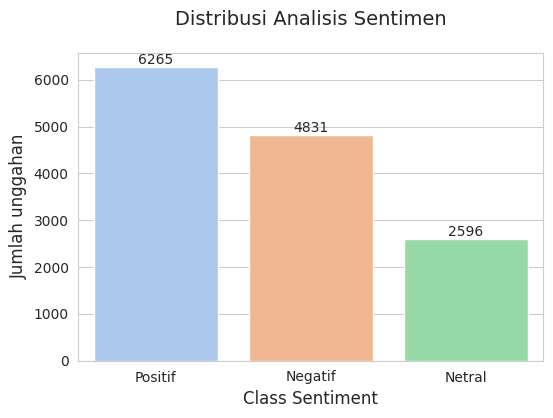

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiments'].value_counts()

sns.set_style('whitegrid')

fig,ax = plt.subplots(figsize=(6,4))
ax=sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Distribusi Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize = 12)
plt.ylabel('Jumlah unggahan', fontsize=12)

for i,count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
df2.to_excel('Hasil-LabelingVaderSentimentLengkap.xlsx')

In [ ]:
df['full_text']=data['full_text']

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/patriarki1-7.csv", sep=',')

In [ ]:
df2['full_text_translated']=df['full_text_translated']
df2['compound_score']=df['Compound_Score']

In [ ]:
df2['sentiment']=df['Sentiments']

In [ ]:
df

,full_text_translated,Compound_Score,Sentiments,full_text
0,allow the wife to use birth control pills even...,0.7269,Positif,mengijinkan istri menggunakan pil kb walaupun ...
1,I'm afraid the doctor will advise me to take b...,0.0314,Positif,pgn dokter takut disaranin minum pil kb lg mak...
2,"generation of birth control pills, birth contr...",0.0000,Netral,generasi pil kb suntik kb
3,The fool thinks that married couples have sex ...,-0.4956,Negatif,si tolol mengira pasangan menikah seks menggun...
4,Preventing pregnancy so that you don't get mor...,0.0772,Positif,mencegah biar ga hamilnambah anak gblk bukan c...
...,...,...,...,...
13687,when will he show patriarchy hahaha,0.5574,Positif,kapan si nunjukin patriarki wkwk
13688,"Thank God, I've had a boyfriend since high sch...",0.8547,Positif,alhamdulillah udah dr sma dpt temen cowok gak ...
13689,It's true that extreme feminists are increasin...,0.5574,Positif,emang sjw feminis ekstrem makin hari makin ga ...
13690,"big no, I really want to continue my career ev...",-0.1157,Negatif,big no emang mau tetep berkarir walaupun udh n...
